In [2]:
# libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96

In [3]:
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
#data=pd.read_csv('gapminderData.csv')
data.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [4]:
# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])

In [5]:
anos=data.year.unique()

<IPython.core.display.Javascript object>


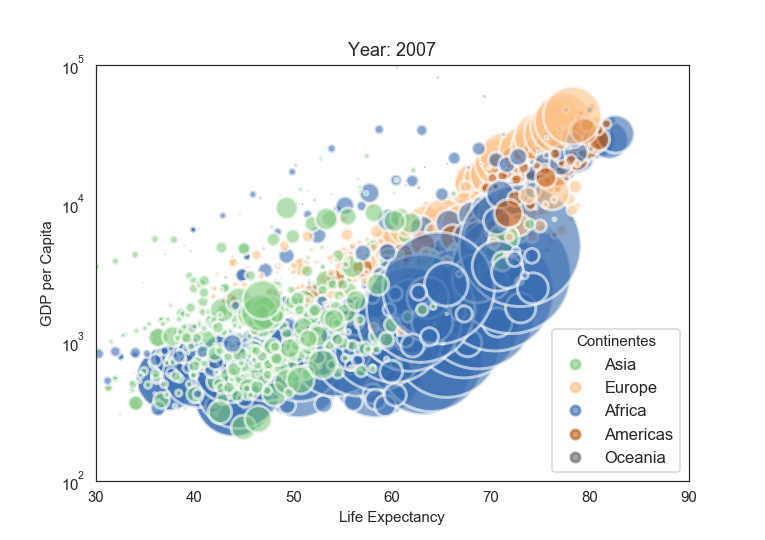

In [6]:
%matplotlib notebook
%matplotlib notebook

# initialize a figure
#fig=plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
fig, ax = plt.subplots(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)


#Criação de lista para posterior legenda:
cont = data.continent.unique()

# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.ylim(100,100000)
plt.xlim(30, 90)

def animate(i):
    plt.title("Year: "+str(anos[i]) )
    tmp=data[ data.year == anos[i] ]
    scut=plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    #scut=ax.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    
#Criação de legenda:
    legenda= ax.legend(handles =scut.legend_elements()[0], labels = cont, loc='lower right', title= 'Continentes', prop={'size': 11})
 
    
ani = animation.FuncAnimation(fig, animate, frames=len(anos), interval=200, blit=False, repeat=False)
    
plt.show()


<strong>Questão A:</strong> *Explique a metodologia para criar a animação em cada um dos casos
(versões). Comente-as. Justifique.*

A grande diferença que se pode observar entre os dois documentos é o tipo de animação e consequentemente também se encontram diferenças no código de cada exercício. 
Ambos os documentos se iniciam da mesma forma, começam por importar as bibliotecas necessárias para o tratament destes dados, exportam o documento de dados de um ficheiro csv online, definir que os dados da coluna 'continent' serão assumidos como numéricos, depois define-se o tamanho da figura em dpi's, definem-se as legendas da figura/gráfico.

No ficheiro **'gapminder_animation.ipynb'** a animação é gerada por anos e por isso gera um gráfico diferente para cada ano usando um ciclo for (for i in data.year.unique()). Nesse ciclo, a cada ano que é analisado o código volta ao início e passa para o ano seguinte.
De seguida guarda as figuras criadas numa variável chamada 'filename'= 'Gapminder_step'+str(i)+'.png, somando a cada imagem +i, ou seja, mais um ano.
Por fim, guarda a imagem criada através da função plt.savefig(filename, dpi=96), que redimensiona a figura para 96 dpi's.



No documento **'gapminder_animation-FuncAnimation_PLOT_SEM-legend**', a imagem é produzida em formato GIF, usando a função animation.FuncAnimation., em que o número de frames corresponde ao número de anos da coluna 'year', com um intervalo entre frames de 200 (número assumido por defeito), e no fim da animação esta não se repete.


<strong>Questão B:</strong> *Temos “bolhas” de cinco (5) cores diferentes. O que representa cada
cor? Justifique, com descrição detalhada do processo.*

Se na quarta linha de código estão a ser tratados dados relativos à coluna 'Continent', alterando-os para um valor numérico, pode-se afirmar que as 5 cores diferentes representam 5 continentes: Asia, Europe, Africa, Americas, Oceania. 

Os valores dos continentes foram alterados para valores numéricos para assim se conseguir atribuir um tamanho à bolha de cada continente, consoante os dados relativos a cada país que constituem o conjunto dos continentes, uma vez que cada bolha está atribuída a um país e as cores das bolhas é que significam a atribuição de um continente.

In [6]:
cont = data.continent.unique()

print (cont)

[Asia, Europe, Africa, Americas, Oceania]
Categories (5, object): [Asia, Europe, Africa, Americas, Oceania]


<strong>Questão C:</strong> *Inserir uma legenda ou legendas com a cor das “bolhas” e o seu
significado, posicionada(s) em área(s) que não se sobreponha(m) às “bolhas”. Fundamente as
opções tomadas.*

In [ ]:
#Criação de lista para uso posterior na legenda:
    cont = data.continent.unique()
#Criação de legenda:
    legenda= ax.legend(handles =scut.legend_elements()[0], labels = cont, loc='lower right', title= "Continentes", prop={'size': 11})

Para a criação das legendas com a cor das bolhas a opção foi a de acrescentar ao código já existente os componentes apresentados na linha de cima (que também se podem encontar no desenvolvimento do exercício mais em cima).

Para a criação das legendas criei uma lista intitulada 'cont' que embloba todos os continentes existentes no ficheiro, não repetindo entradas iguais.

De seguida, dentro da função anterior que cria o gráfico, acrescentou-se a variável 'legenda'. Aqui usou-se a função ax.legend() que permite criar uma legenda usando elementos do gráfico e especificou-se que os elementos a constar na legenda. 

A legenda teria de conter a mesma cor das bolhas e teria de corresponder ao nome do continente, assim, fez-se uma legenda que assume as cores específicas do gráfico denominado 'scut'.

Para escrever a função ax.legend() usaram-se os seguintes argumentos:

handles =scut.legend_elements()[0] : a função handles permite invocar indirectamente uma função, que neste caso será a scut, assim a legenda reconhecerá elementos da função anterior, como as cores;

labels = cont :  vai buscra à variável 'cont' os nomes dos continentes;

loc='lower right' : localização da caixa da legenda no canto inferior direito, foi escolhida esta localização para a legenda não se sobrepor às bolhas;

title= 'Continentes' : atribuição de título às legendas;

prop={'size': 11} : atribuição de um tamanho específico à caixa das legendas para esta ter melhor leitura.
